In [75]:

import pandas as pd
from datetime import datetime, timedelta

train = pd.read_csv('train.csv.zip')
train['DATE'] = pd.to_datetime(train['DATE'])

# Unique ATMs
ATM_IDs = train.ATM_ID.unique()

# The dates to predict
pred_dates  = ['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31',
               '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16',
               '2017-09-17']


month_ago = pd.to_datetime(pred_dates)
month_ago = month_ago - timedelta(days=35)

rows = []
for ATM in ATM_IDs: 
    for i in range(len(pred_dates)):
        date = pred_dates[i]
        value = train[(train.ATM_ID==ATM) & (train.DATE==month_ago[i])]['CLIENT_OUT'].values[0]
        rows.append([date, ATM, value])

submission = pd.DataFrame(rows, columns = ['DATE', 'ATM_ID', 'CLIENT_OUT'])                    
# submission.to_csv('submission.csv', index=False)
print(len(pred_dates))
print(submission.shape)

33
(9900, 3)


In [70]:
%matplotlib inline
df = train[train.ATM_ID == 0]
df = df.set_index(df.DATE)
df = df.CLIENT_OUT

In [71]:
# import numpy as np
# df = np.log(df)
# df = df.resample('W', how='mean')
# df.plot(figsize=(12,6))

In [72]:
dfp = df.reset_index()
dfp.columns = ['ds', 'y']


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/eamag/.pyenv/versions/3.6.0/envs/general/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



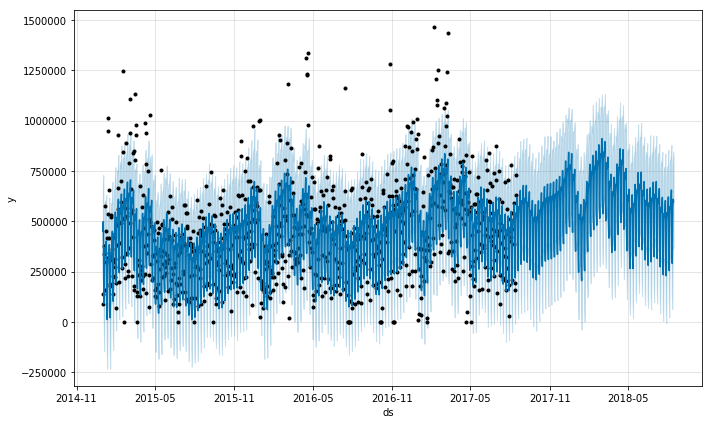

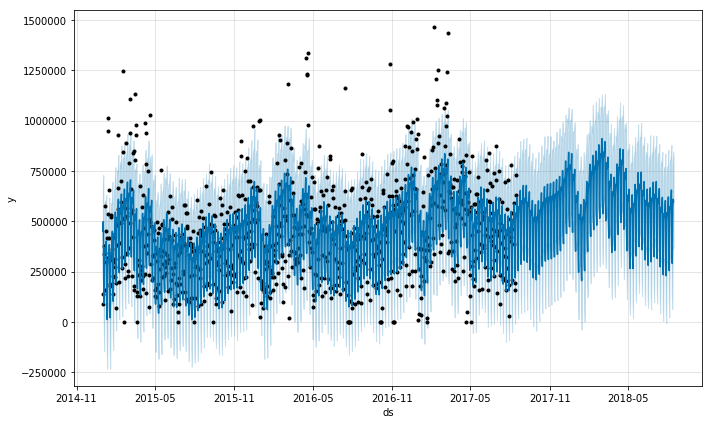

In [73]:
from fbprophet import Prophet
m = Prophet()
m.fit(dfp)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast)

In [ ]:
valid_dates = pd.date_range('2017-07-14', '2017-08-15').tolist()
len(valid_dates)
train_df = train[train.DATE<valid_dates[0]]
train_df

In [77]:
rows = []
for ATM in ATM_IDs[:50]: 
    for i in range(len(valid_dates)):
        date = valid_dates[i]
        value = train[(train.ATM_ID==ATM) & (train.DATE==valid_dates[i])]['CLIENT_OUT'].values[0]
        rows.append([date, ATM, value])

submission_valid = pd.DataFrame(rows, columns = ['DATE', 'ATM_ID', 'CLIENT_OUT'])                    
submission_valid.shape

(1650, 3)

In [81]:
one_atm = train_df[train_df.ATM_ID == 0][['DATE', 'CLIENT_OUT']]
one_atm.columns = ['ds', 'y']


In [86]:
from fbprophet import Prophet
m = Prophet()
m.fit(one_atm)
future = m.make_future_dataframe(periods=33)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# m.plot(forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/eamag/.pyenv/versions/3.6.0/envs/general/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper
953,2017-08-11,565431.379503,336493.455968,793550.439227
954,2017-08-12,278894.610268,53786.049301,524482.700496
955,2017-08-13,204245.503666,-45647.404690,443462.506185
956,2017-08-14,475423.462079,221991.277400,703202.345966
957,2017-08-15,525431.562871,280439.289248,750675.070684


In [100]:
forecast[-33:].yhat.iloc[0]

579730.6640017421

In [101]:
year_ago = pd.to_datetime(valid_dates) - timedelta(days=31)
# year_ago = pd.date_range('2017-03-01', '2017-04-02').tolist()
rows = []
for ATM in ATM_IDs[:50]: 
    one_atm = train_df[train_df.ATM_ID == ATM][['DATE', 'CLIENT_OUT']]
    one_atm.columns = ['ds', 'y']
    m = Prophet()
    m.fit(one_atm)
    future = m.make_future_dataframe(periods=33)
    values = m.predict(future)[-33:]['yhat']
    for i in range(len(valid_dates)):
        date = valid_dates[i]
#         value = train[(train.ATM_ID==ATM) & (train.DATE==year_ago[i])]['CLIENT_OUT'].values[0]
        value = values.iloc[i]
        rows.append([date, ATM, value])

submission = pd.DataFrame(rows, columns = ['DATE', 'ATM_ID', 'CLIENT_OUT'])   

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/eamag/.pyenv/versions/3.6.0/envs/general/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seas

In [102]:
from score_submission import scorer, check_submission
check_submission(submission)
scorer(submission_valid, submission)*10000

6990.678873354461

In [104]:
%matplotlib inline
from matplotlib import pyplot as plt 

# plot figures and save to folder
for atm in ATM_IDs[:50]:
    fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
    ax.plot(submission_valid[submission_valid.ATM_ID==atm].CLIENT_OUT)
    ax.plot(submission[submission.ATM_ID==atm].CLIENT_OUT)
    fig.savefig('pics/'+str(atm)+'.png')   # save the figure to file
    # plt.show()
    plt.close(fig)    # close the figure


In [114]:
def score_series(y_true, y_pred):
    """
        Expects y_true and y_pred to be 1d arrays of the same lenght
    """
    return np.mean(np.abs(y_true - y_pred))/np.mean(np.abs(y_true))
def scorer_arr(df_true, df_pred):
   
    scores = []
    for ID in df_true.ATM_ID.unique():
        
        df_true_part = df_true.query('ATM_ID == @ID')
        df_pred_part = df_pred.query('ATM_ID == @ID')
        
        
        if df_true_part.shape[0] != df_pred_part.shape[0]:
            print("$Wrong number of predictions for ATM_ID = %d$" % ID)
            sys.exit(4)

        if not np.all(df_true_part.DATE == df_pred_part.DATE):
            print("$Could not parse dates for ATM_ID = %d. Wrong format\encoding? Duplicated/wrong dates?$" % ID)
            sys.exit(4)
       
        score = score_series(df_true_part.CLIENT_OUT, df_pred_part.CLIENT_OUT)
        scores.append(score)
    
#     return np.mean(scores)
    return scores
scores = scorer_arr(submission_valid, submission)

In [116]:
np.argsort(scores)


array([18, 12, 13,  5, 33,  0, 40, 46, 29, 21, 31, 41, 14, 44, 19, 22, 48,
       23,  3, 32, 42, 20, 24, 36,  2,  9, 39, 47, 30, 43,  4, 28,  6, 34,
       37, 15, 10, 45, 26, 11,  8, 16, 35, 25,  1, 38, 17, 27, 49,  7])

In [127]:
scores

[0.21835900166637956,
 1.043136376229231,
 0.5037201757969252,
 0.4326125620603491,
 0.6281910176503738,
 0.18743906772587313,
 0.6471849807366512,
 4.262977651507943,
 0.8796405348063812,
 0.5569244572939269,
 0.6820808359448324,
 0.8418585151595652,
 0.1655504628400933,
 0.17721087585465112,
 0.29635017145363474,
 0.6735747981303168,
 0.8983933292871957,
 2.02915566041923,
 0.16048304963542248,
 0.33452391833887607,
 0.4821184754842341,
 0.2508208391894393,
 0.33600284306760847,
 0.41222270104231956,
 0.48266389058785536,
 0.9816318071429377,
 0.7813320708430684,
 2.2461839310996465,
 0.6372645198558093,
 0.2384693532263206,
 0.5952641928563094,
 0.27459291387760215,
 0.4539628881145227,
 0.20543356169867646,
 0.6620004863829667,
 0.9679720964507883,
 0.5020906050691447,
 0.6674749802852545,
 1.0639341089998495,
 0.563078617112121,
 0.22530946897144094,
 0.2771478814121072,
 0.4573583494992938,
 0.5962686660992189,
 0.3143900819488458,
 0.7421729874828411,
 0.22833115469095988,
 0.57